<a href="https://colab.research.google.com/github/imswabhab/Projects-ML/blob/master/Diabetes_deeplearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#importing Relevant Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

#ignoring the warnings
import warnings
warnings.filterwarnings('ignore')

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#importing the dataset
raw_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/diabetes.csv')

In [0]:
#making  a copy oof the orginal dataset
data = raw_data.copy()

In [26]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [27]:
data.tail(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
758,1,106,76,0,0,37.5,0.197,26,0
759,6,190,92,0,0,35.5,0.278,66,1
760,2,88,58,26,16,28.4,0.766,22,0
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [28]:
#checking for noise values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [29]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


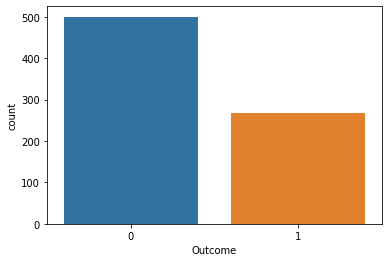

In [30]:
#plotting the outcome to check difference in frequencies

sns.countplot(x = 'Outcome', data = data)

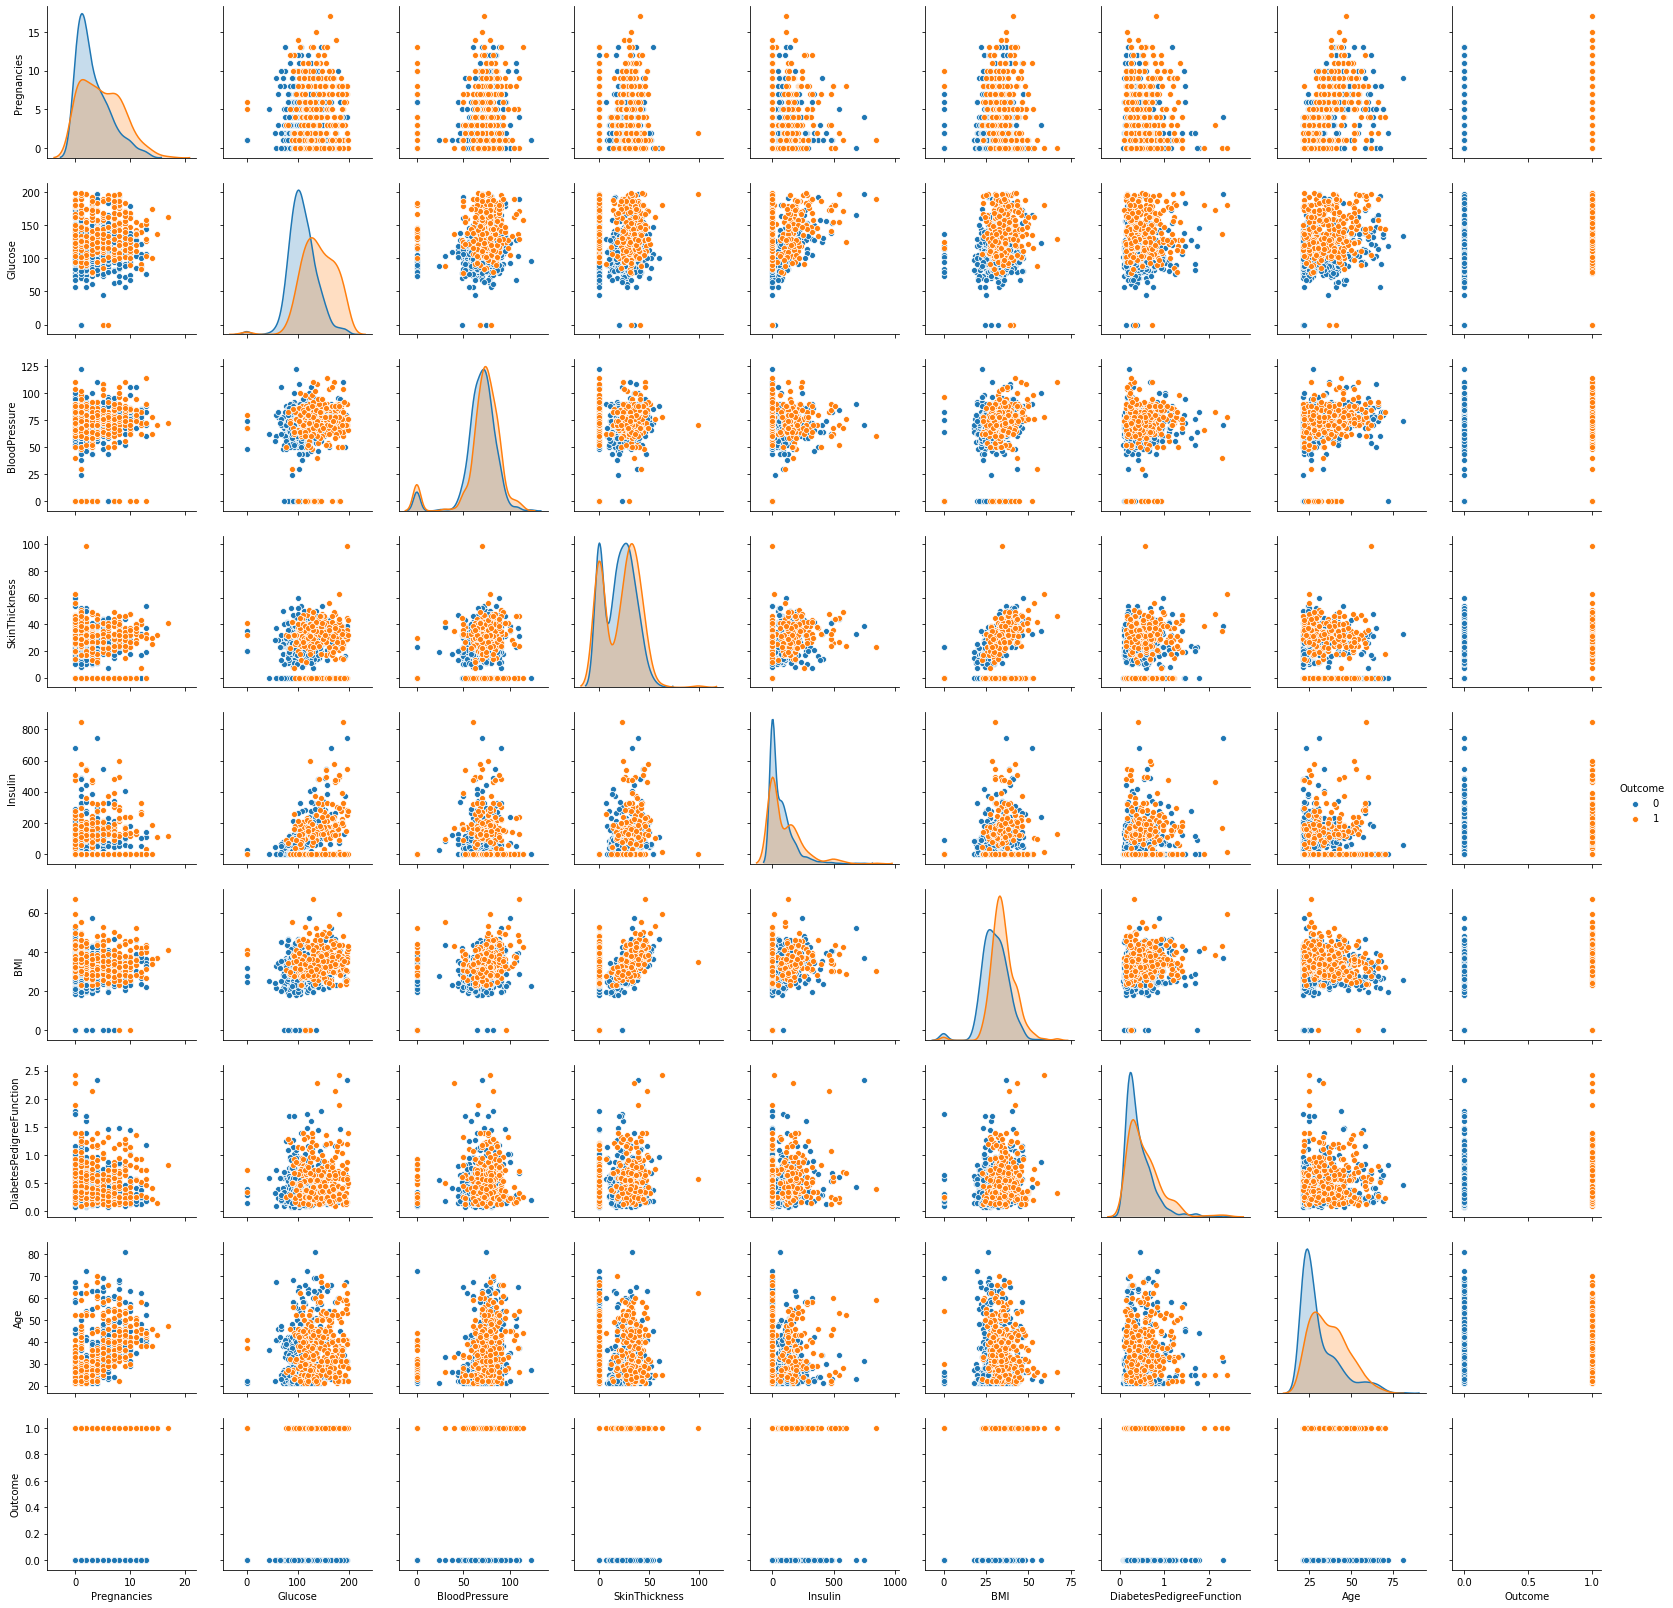

In [31]:
#checking the dataset taking hue as Outcome
sns.pairplot(data, hue= 'Outcome')

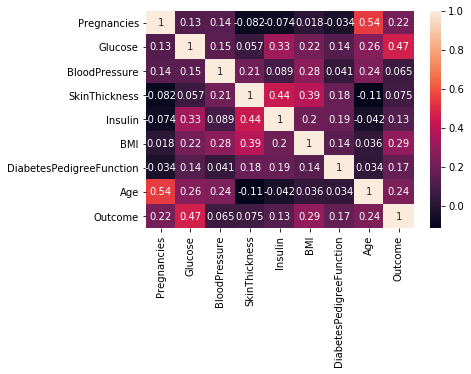

In [32]:
#checking the correlation

sns.heatmap(data.corr(), annot= True)

In [0]:
x = data.iloc[:, 0:8].values
y =data.iloc[: ,8].values

In [34]:
x

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [35]:
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [0]:
#feature Scaling 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [0]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.15)

In [0]:
#building the classifier
classifier = tf.keras.models.Sequential()
classifier.add(tf.keras.layers.Dense(units=400, activation='relu', input_shape=(8, )))
classifier.add(tf.keras.layers.Dropout(0.2))

classifier.add(tf.keras.layers.Dense(units=400, activation='relu'))
classifier.add(tf.keras.layers.Dropout(0.2))

classifier.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))


In [39]:
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 400)               3600      
_________________________________________________________________
dropout_4 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 400)               160400    
_________________________________________________________________
dropout_5 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 401       
Total params: 164,401
Trainable params: 164,401
Non-trainable params: 0
_________________________________________________________________


In [40]:
classifier.compile(optimizer='Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [41]:
epochs_hist = classifier.fit(x_train,y_train, epochs = 200 )

Train on 652 samples
Epoch 1/200
652/652 [==============================] - 2s 3ms/sample - loss: 0.5110 - acc: 0.7561
Epoch 2/200
652/652 [==============================] - 0s 92us/sample - loss: 0.4595 - acc: 0.7715
Epoch 3/200
652/652 [==============================] - 0s 87us/sample - loss: 0.4371 - acc: 0.7899
Epoch 4/200
652/652 [==============================] - 0s 86us/sample - loss: 0.4307 - acc: 0.8006
Epoch 5/200
652/652 [==============================] - 0s 91us/sample - loss: 0.4200 - acc: 0.8037
Epoch 6/200
652/652 [==============================] - 0s 83us/sample - loss: 0.4182 - acc: 0.7945
Epoch 7/200
652/652 [==============================] - 0s 84us/sample - loss: 0.4115 - acc: 0.8067
Epoch 8/200
652/652 [==============================] - 0s 90us/sample - loss: 0.4100 - acc: 0.8067
Epoch 9/200
652/652 [==============================] - 0s 100us/sample - loss: 0.4039 - acc: 0.8098
Epoch 10/200
652/652 [==============================] - 0s 91us/sample - loss: 0.3958 - 

In [42]:
#predicting X_test
y_pred = classifier.predict(x_test)
y_pred

array([[9.97796237e-01],
       [2.61425972e-04],
       [6.24530315e-02],
       [1.00000000e+00],
       [0.00000000e+00],
       [1.72932655e-01],
       [8.21174860e-01],
       [9.99977827e-01],
       [1.16527081e-05],
       [8.32493007e-02],
       [9.41764951e-01],
       [4.00143862e-03],
       [2.68220901e-07],
       [8.77767801e-04],
       [1.08735263e-02],
       [2.98023224e-08],
       [1.82822943e-02],
       [5.96046448e-08],
       [1.49011612e-07],
       [9.17576253e-02],
       [6.52167201e-03],
       [4.04381752e-03],
       [2.74671853e-01],
       [7.45058060e-07],
       [4.51207161e-05],
       [1.22189522e-06],
       [7.21782446e-04],
       [6.12024367e-02],
       [9.99385118e-01],
       [3.92930806e-01],
       [9.99988079e-01],
       [1.89480186e-03],
       [5.30183315e-05],
       [6.88222051e-03],
       [0.00000000e+00],
       [1.72802806e-03],
       [5.82475066e-02],
       [1.54972076e-05],
       [3.01301479e-05],
       [2.95427442e-03],


In [0]:
y_pred = (y_pred > 0.5)

In [44]:
y_pred

array([[ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [

In [45]:
epochs_hist.history.keys()

dict_keys(['loss', 'acc'])

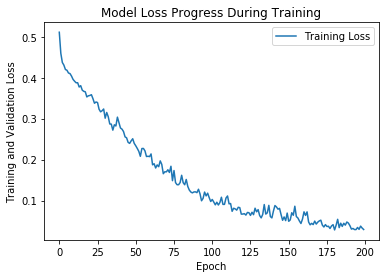

In [46]:
#Evaluating the Model
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss'])

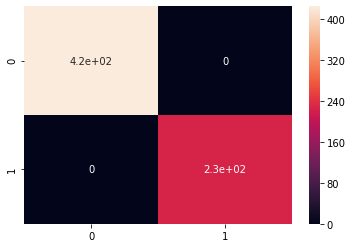

In [48]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

y_train_pred = classifier.predict(x_train)
y_train_pred = (y_train_pred > 0.5)
cm = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm, annot=True)

In [49]:
from sklearn.metrics import classification_report

print(classification_report(y_train_pred, y_train))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00       425
        True       1.00      1.00      1.00       227

    accuracy                           1.00       652
   macro avg       1.00      1.00      1.00       652
weighted avg       1.00      1.00      1.00       652



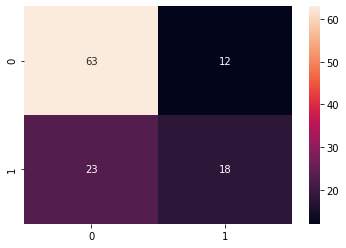

In [50]:
# Testing Set Performance
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)


In [51]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.84      0.78        75
           1       0.60      0.44      0.51        41

    accuracy                           0.70       116
   macro avg       0.67      0.64      0.64       116
weighted avg       0.69      0.70      0.69       116

